# Matplotlib Tutorial

## The fundamentals to get high level visualizations



> many reference & image from [matplotlib cheatsheet](https://github.com/rougier/matplotlib-cheatsheet)

***This is a notebook which organizes various tips and contents of matplotlib which we browse every day.***




### Table of Contents 


0. **Setting**

    - dpi
    - figsize
    - title
    
    
    
1. **Alignments**

    - subplots, tight_layout
    - subplot2grid
    
    
    
2. **Colormap**
    
    - diverging
    - qualitative
    - sequential
    - scientific
    
    
    
3. **Customization** 
    
    - Main parameters
    - Example 1
    - Example 2


In [25]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # theme



# Settings

Set the resolution through the **dpi** (Dots per Inch) setting of the figure.
matplotlib has a low default resolution itself, so setting this up is a bit more professional.

`plt.rcParams['figure.dpi'] = 200` or `dpi=200`

And for every plot set **figsize**.
The graph gives a very different feeling depending on the ratio. (I think it's best to try this heuristic multiple times.)

There are many places in matplotlib where you can write **titles** based on objects such as `plt.title ()`, `ax.set_title ()`, `fig.suptitle()`. If you add a title that takes into account font size and font family, fontweight, position, etc., it will be more readable.

In [22]:
# Matplotlib settings
#==============================

plt.rcParams['figure.dpi'] = 100
#plt.style.use('ggplot')

# Alignments

Two or more graphs are much more visually and semantically better than just one.

The easiest way to do this is to place the rectangles of the same shape.

Usually you can start with the initial size with subplots.

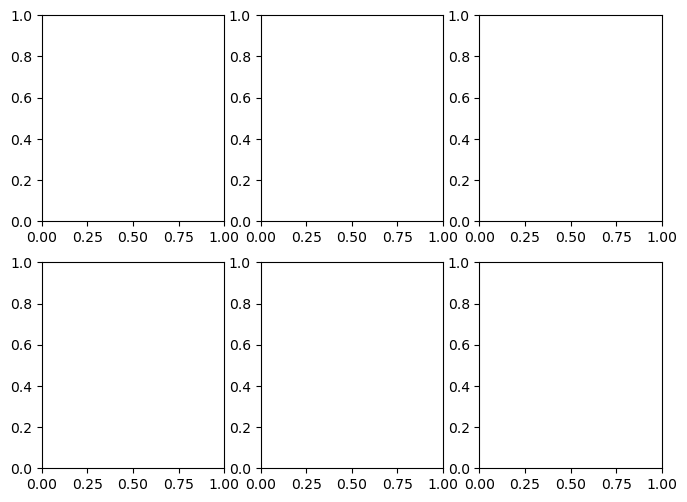

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
plt.show()

The first of the `plt.subplot()` parameters specifies the number of rows and the second the number of columns.
The graph looks a bit frustrating. In this case, you can use `plt.tight_layout()` to solve the frustration.

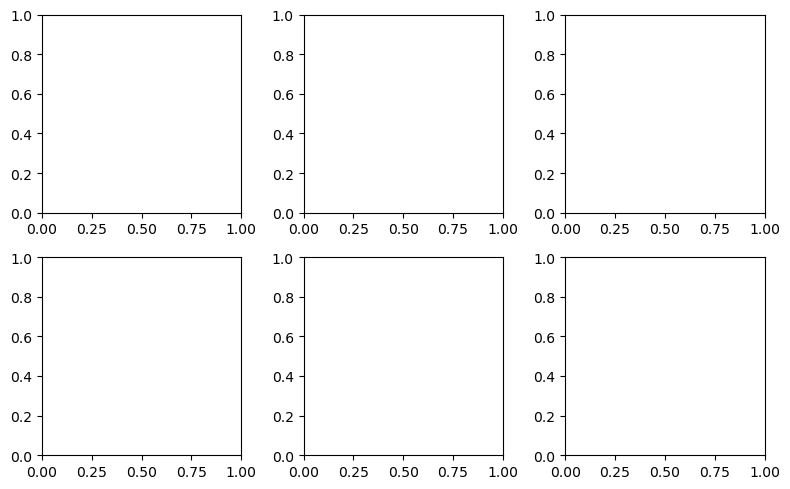

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

But should it be the same size depending on the subplot?
For example, bar graphs and pie charts are often very different in ratio.

In this case, the layout should be different.

In this case, you can easily use the grid system using `plt.subplot2grid`.


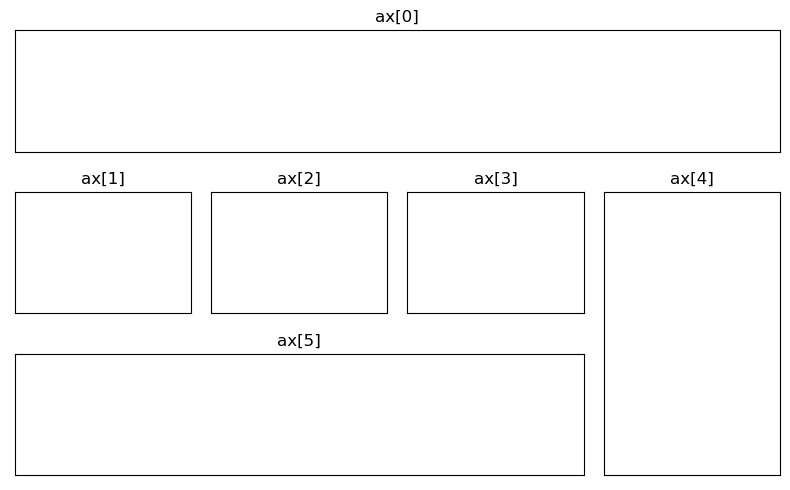

In [25]:
# with subplot2grid
#==============================

fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)


for ix in range(6): 
    ax[ix].set_title('ax[{}]'.format(ix)) # make ax title for distinguish:)
    ax[ix].set_xticks([]) # to remove x ticks
    ax[ix].set_yticks([]) # to remove y ticks
    
fig.tight_layout()
plt.show()

# Colormap

> [How to Choose Colors for Your Data Visualizations](https://medium.com/nightingale/how-to-choose-the-colors-for-your-data-visualizations-50b2557fa335)

Color is very important in the graph. Of course the matplotlib team has already created a good color palette, and we just need to use it.

This time, I'll show you the color palette in matplotlib and which graph to use.

- diverging
- qualitative
- sequential
- scientific

### Diverging Colormap

This colormap is usually used in visualizations where the median is obvious.

It is usually visualized on a white background, white in the center, and darker in color toward both ends. In other words, the lighter the value, the closer to the center, the darker, the closer to the end.

Useful for **expressing bias**, such as correlation and political disposition.

Currently it is a continuous colormap, but you can also use discrete colorpalette depending on the interval.

matplotlib loads the library's palette with that element in the `cmap` parameter. You can, of course, make it custom.

In [28]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()


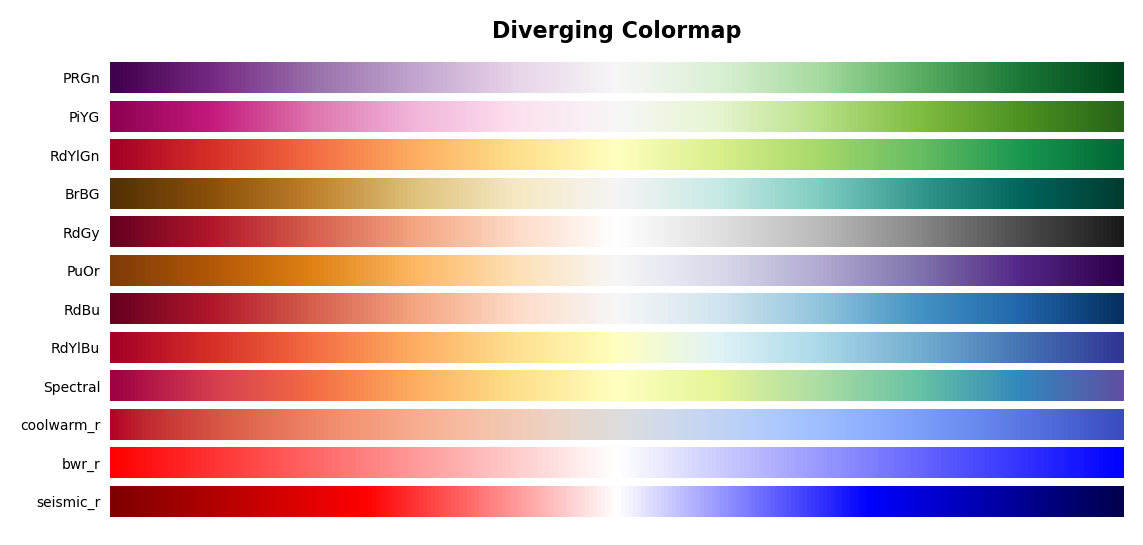

In [29]:
# _r mean reverse

diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Diverging')

### Qualitative Colormap

A palette of independent colors, often used for **categorical variables**. 

It is recommended to organize up to 10 colors, and to group more and smaller categories with other. 

Repeating colors can be confusing, so ***try to avoid overlapping as much as possible.*** It's a good idea to change color to color rather than saturation and brightness.

Personally, I like `Set2` palette.

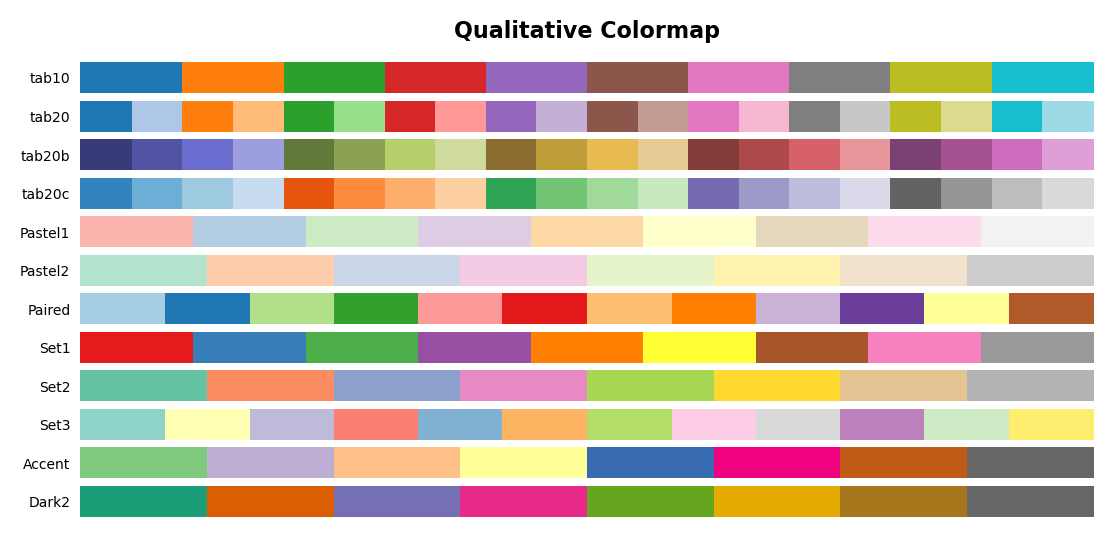

In [30]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Qualitative')

Personally, I like to use this palette when visualizing after dimension reduction such as t-sne.

### Sequential Colormap

This palette is appropriate for variables with **numbers or sorted values**. 

Used a lot in **comparison** of figures. Especially effective for expressing density. Take advantage of map graphs for better visualization.

Similar to diverging, but with a slightly different part because each endpoint is a color criterion, not the median. It usually indicates that light values are dark on dark backgrounds and dark values on light backgrounds. 

It is recommended to use a single hue for the color.


Like diverging, it can also be used in **discrete form**.

> `_r` means *'reverse'*.

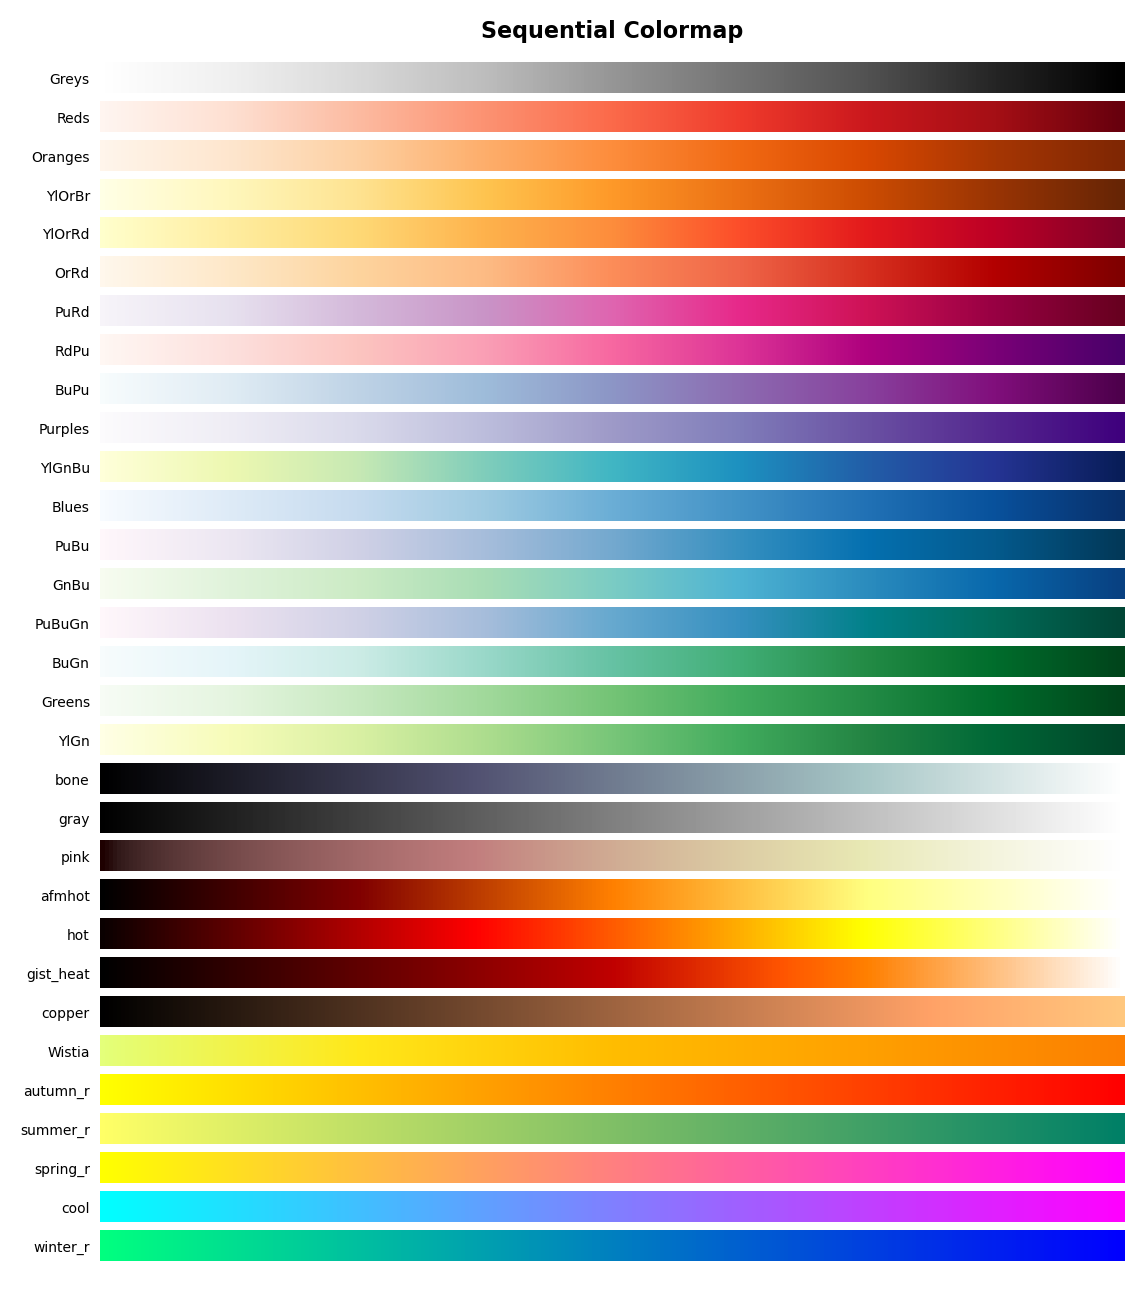

In [31]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

It can be used to give a gradual feeling or to check the emphasis of a particular part.

The following visualizations are possible:

### Scientific Colormap

I don't know why, but it's used a lot in scientific visualization.
It is used as a basic colormap of plotly and has high utilization and relatively professional feel.

I've seen it often used in **signal data** like spectrograms when dealing with voice data.

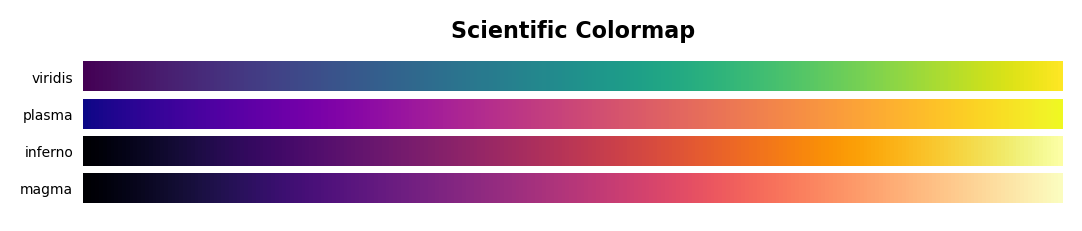

In [34]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

# Customization of Fig and Axes

When we make our graphs using the `plt.subplots ()` function we will have to modify the way to customize the graph. To begin with, when making different types of graphs (plot, scatter, bar charts ...) it will not be necessary to add the prefix plt. but we can assign it directly to our axes using `axes[i].plot ()`



## Example nº1

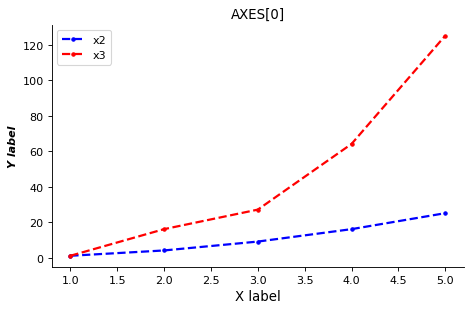

In [23]:
# Creating two lineplots in a fig
#====================================

x = [1,2,3,4,5]
y = [1,4,9,16,25]
y2 = [1,16,27,64,125]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=80)

axes.set_title("AXES[0]")
axes.set_xlabel("X label", fontsize=12)
axes.set_ylabel("Y label", style="italic", fontweight="bold")

axes.plot(x,y,"b.--", lw=2, label="x2")
axes.plot(x,y2,"r.--", lw=2, label="x3")



axes.legend()

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

fig.tight_layout()

## Example nº2

In [18]:
# Dataset = StudentsPerformance.csv
# Source = Kaggle
#===================================

df = pd.read_excel("StudentsPerformance.xlsx", engine="openpyxl")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In this case, we can directly create the figure and add the axis, within the graph function itself. Seaborn allows us to easily perform this operation with the function `ax =`

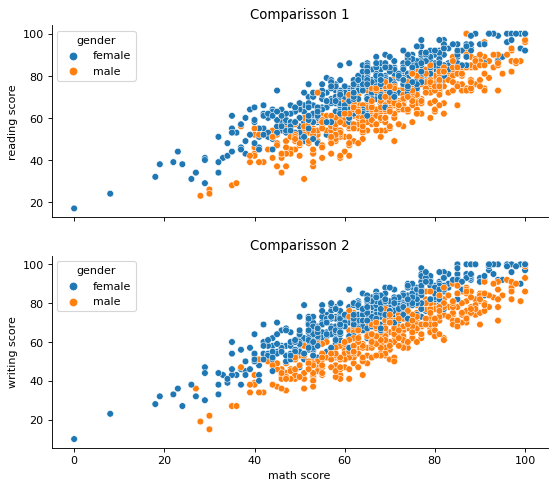

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,7), sharex=True, dpi=80)

sns.scatterplot(x="math score",
                y="reading score",
                data=df,
                hue="gender",
                ax=axes[0])

axes[0].set_title("Comparisson 1")

sns.scatterplot(x="math score",
                y="writing score",
                data=df, 
                hue="gender",
                ax=axes[1])

axes[1].set_title("Comparisson 2")

sns.despine() # To remove right and up borders

# It's all by now!

## Session Informacion


In [26]:
from sinfo import sinfo

sinfo()

-----
matplotlib  3.3.2
numpy       1.19.2
pandas      1.1.5
seaborn     0.11.1
sinfo       0.3.1
-----
IPython             7.19.0
jupyter_client      6.1.7
jupyter_core        4.7.0
jupyterlab          2.2.6
notebook            6.1.6
-----
Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
8 logical CPU cores, Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
-----
Session information updated at 2021-04-21 12:43
